##### Yahya Houti

##### 2022-08 Data Engineering

In [ ]:
##### 03-24.2023

In [1]:
import psycopg2
import getpass
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
import matplotlib.pyplot as plt

1b. (optional) If you get an error "no module nameed '?'" - you can install it here using conda or pip

In [ ]:
!conda install psycopg2

##### 2. Next, create the connection parameters.

In [6]:
redshift_endpoint = "capstone-project.cjt3wojpgdhm.us-east-1.redshift.amazonaws.com"
redshift_user = 'awsuser'
redshift_pass = getpass.getpass()
port = 5439
dbname = 'dev'

········


##### 3. Then, create the connection string and establish a connection to Redshift.

In [7]:
engine_string = "postgresql+psycopg2://%s:%s@%s:%d/%s" \
% (redshift_user, redshift_pass, redshift_endpoint, port, dbname)
engine = create_engine(engine_string)

##### 4. After that, construct the SQL query. This notebook uses an example of movies and box office data

In [23]:
sql = """
select count(*), year, model from capstone.saturndata group by year, model order by count(*) limit 100;
"""

##### 5. And finally, execute the SQL query against the Redshift database and display the results.

In [24]:
tables = []
output = engine.execute(sql)
for row in output:
    tables.append(row)
tables

[(1, '2017', 'm3'),
 (3, '2016', 'ms'),
 (6, '2016', 'mx'),
 (10, '2022', 'mx'),
 (12, '2017', 'ms'),
 (14, '2021', 'mx'),
 (15, '2020', 'ms'),
 (15, '2022', 'ms'),
 (21, '2022', 'my'),
 (21, '2022', 'm3'),
 (29, '2019', 'ms'),
 (31, '2017', 'mx'),
 (44, '2020', 'mx'),
 (48, '2018', 'ms'),
 (59, '2019', 'mx'),
 (67, '2021', 'm3'),
 (72, '2021', 'ms'),
 (75, '2018', 'mx'),
 (82, '2020', 'my'),
 (137, '2021', 'my'),
 (154, '2018', 'm3'),
 (198, '2020', 'm3'),
 (465, '2019', 'm3')]

### Now the data is ready for tidying or if already tidy for EDA and statistical analysis.

<p> Let's put the data in the tables list into a pandas DataFrame, You don't need to explisitly call pandas.DataFrame(). Any time you "read" something with pandas it will return a pandas.DataFrame

In [26]:
saturndata = pd.read_sql_query(text(sql), engine)

<p> and display it.

In [27]:
saturndata

,count,year,model
0,1,2017,m3
1,3,2016,ms
2,6,2016,mx
3,10,2022,mx
4,12,2017,ms
5,14,2021,mx
6,15,2020,ms
7,15,2022,ms
8,21,2022,my
9,21,2022,m3


<p> Now, let's get some stats and take a look and the first and last few records.

In [12]:
saturndata.describe()

,year,model
count,23,23
unique,7,4
top,2020,mx
freq,4,7


In [13]:
saturndata.head()

,year,model
0,2016,mx
1,2016,ms
2,2017,mx
3,2017,ms
4,2017,m3


In [14]:
saturndata.tail()

,year,model
18,2021,mx
19,2022,mx
20,2022,ms
21,2022,m3
22,2022,my


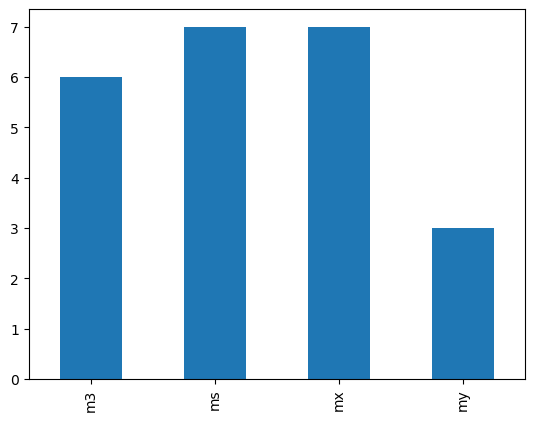

In [15]:
saturndata['model'].value_counts().sort_index().plot.bar()
plt.show()

In [16]:
sql2 = """
SELECT year, model, COUNT(*) FROM capstone.saturndata
GROUP BY year, model
"""

In [17]:
saturndata_yr_df = pd.read_sql_query(text(sql2), engine)

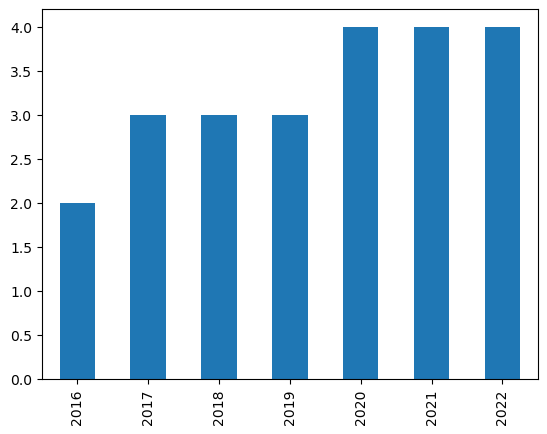

In [18]:
saturndata_yr_df['year'].value_counts().sort_index().plot.bar()
plt.show()